# The first step is to import the required Librairies

In [1]:
"""pandas is a Python package that provides fast, flexible, and expressive data structures
designed to make working with "relational" or "labeled" data both easy and intuitive."""
import pandas as pd
"""NumPy is a Python library used for working with arrays.
It also has functions for working in domain of linear algebra, fourier transform, and matrices."""
import numpy as np

"""Matplotlib is a comprehensive library for creating static, animated, and interactive
visualizations in Python. Matplotlib makes easy things easy and hard things possible."""
import  matplotlib.pyplot as plt 
"""OpenCV is the huge open-source library for the computer vision, machine learning, and image 
processing and now it plays a major role in real-time operation which is very important
in today’s systems"""
import cv2
"""This module provides a portable way of using operating system dependent functionality. If you
just want to read or write a file see open(), if you want to manipulate paths, see the os.path 
module, and if you want to read all the lines in all the files on the command line see the 
fileinput module"""
import os
"""The Python Imaging Library adds image processing capabilities to your Python interpreter.
This library provides extensive file format support, an efficient internal representation, 
and fairly powerful image processing capabilities."""
from PIL import Image
"""scikit-learn is a Python module for machine learning built on top of SciPy and is distributed
under the 3-Clause BSD license."""
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import itertools
"""Tensorflow is one of the most-used deep-learning frameworks. It’s arguably the most popular
machine learning platform on the web, with a broad range of users from those just starting out, 
to people looking for an edge in their careers and businesses. """
import tensorflow as tf 
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense ,Flatten,Dropout
print('the cell was executed without errors')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications.vgg19 import   VGG19
#from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers, models, Model, optimizers
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

the cell was executed without errors


In [2]:
Path_Data=r'C:\Users\kabir\Desktop\Projects\American_Sign_Language\data\processed'
Data=pd.read_csv(os.path.join(Path_Data,"Data.csv")) 


# We are going to load our Dataset

In [3]:
data_path=r"C:\Users\kabir\Desktop\Projects\American_Sign_Language\data\raw\Data\asl_alphabet_train"
#model.save(os.path.join(Path_model,"Amazigh_Handwritten_Recognition_3.h5"))
categories=os.listdir(data_path)
print(categories)
number_Classes=len(categories)
print(number_Classes)

['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
29


In [4]:

print('the cell was executed without errors')

the cell was executed without errors


In [5]:
"""
Data['Classes']=Data['Classes'].astype(str)

dummies =pd.get_dummies(Data['Classes'],drop_first=True).astype(int)
Examples=Data['Path']

merged = pd.concat([Examples,dummies],axis=1)
labels=['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P',
'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
29
"""


"\nData['Classes']=Data['Classes'].astype(str)\n\ndummies =pd.get_dummies(Data['Classes'],drop_first=True).astype(int)\nExamples=Data['Path']\n\nmerged = pd.concat([Examples,dummies],axis=1)\nlabels=['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P',\n'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']\n29\n"

In [6]:
from sklearn.model_selection import train_test_split
Train, Validation = train_test_split(Data, test_size = 0.3, random_state = 20)
train_datagen =  ImageDataGenerator(    
    rescale = 1./255
                                   )  # val 20%
#test_datagen = ImageDataGenerator( rescale=1./255)


train_generator=train_datagen.flow_from_dataframe(
dataframe=Train,
directory=data_path,
x_col='Path',
y_col='Classes',
batch_size=64,
seed=42,
shuffle=False,
class_mode="categorical",
#class_mode="sparse",

target_size=(64,64))
validation_generator=train_datagen.flow_from_dataframe(
dataframe=Validation,
directory=data_path,
x_col='Path',
y_col='Classes',
batch_size=64,
seed=42,
shuffle=False,
class_mode="categorical",

#class_mode="sparse",
target_size=(64,64))

print('the cell was executed without errors')


Found 60900 validated image filenames belonging to 29 classes.
Found 26100 validated image filenames belonging to 29 classes.
the cell was executed without errors


In [22]:

""""input_shape: optional shape tuple, only to be specified if include_top is False (otherwise
the input shape has to be (224, 224, 3) (with channels_last data format) or (3, 224, 224) 
(with channels_first data format). It should have exactly 3 input channels, and width and height 
should be no smaller than 32. E.g. (200, 200, 3) would be one valid value."""

"""img_input=(64, 64, 3)
vgg=VGG16(weights='imagenet', include_top=False,pooling='avg', input_shape=img_input)
for layer in vgg.layers[:-2]:
    layer.trainable = False
x = vgg.output
x = Dense(64, activation="relu")(x)
x = Dropout(0.4)(x)
x = Flatten(name="flatten")(x)
x = Dense(2048, activation='relu')(x)
x = Dense(2048, activation='relu')(x)
prd = Dense(number_Classes,activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prd)
model.summary()
print('the cell was executed without errors')"""

'img_input=(64, 64, 3)\nvgg=VGG16(weights=\'imagenet\', include_top=False,pooling=\'avg\', input_shape=img_input)\nfor layer in vgg.layers[:-2]:\n    layer.trainable = False\nx = vgg.output\nx = Dense(64, activation="relu")(x)\nx = Dropout(0.4)(x)\nx = Flatten(name="flatten")(x)\nx = Dense(2048, activation=\'relu\')(x)\nx = Dense(2048, activation=\'relu\')(x)\nprd = Dense(number_Classes,activation=\'softmax\')(x)\nmodel = Model(inputs=vgg.input, outputs=prd)\nmodel.summary()\nprint(\'the cell was executed without errors\')'

In [23]:
img_input=(64, 64, 3)
vgg=VGG16(weights='imagenet', include_top=False,pooling='avg', input_shape=img_input)

for layer in vgg.layers:
    layer.trainable = False

x = vgg.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(number_Classes, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=predictions)

display(model.summary())
display(tf.keras.utils.plot_model(model, to_file='vgg16.png', show_shapes=True))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

None

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None

In [24]:
Path_Weights=r"C:\Users\kabir\Desktop\Projects\American_Sign_Language\models\CNN\Weights"
#//checking checkpoint for selecting the best model for the emotion detection and save the best model with minimum validation loss having the name written on it in the current working folder
checkpoint = ModelCheckpoint(r"C:\Users\kabir\Desktop\Projects\American_Sign_Language\models\VGG16\Weights\Weights_6.h5",
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

#//reduce_lr will also monitor the validation loss 
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=2,
                              verbose=1,
                              min_lr=.0000001)
#callb = [earlystop, checkpoint, reduce_lr]

call=[ checkpoint,reduce_lr]

In [25]:
adam = Adam(learning_rate=.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [26]:
s=train_generator.n/64
print(s)

951.5625


In [27]:

batch_size=512
#//This last block of codes will train our codes with the given parameters where it will fit train generator for training epochs to 25, callbacks will call the earlystop, checkpoint and reduce_lr and validation data will be equal to validation generator which was created on the first execution 
history = model.fit_generator(generator=train_generator,steps_per_epoch=train_generator.n/batch_size, epochs=100
                              ,validation_data=validation_generator,validation_steps=validation_generator.n/batch_size)

C:\Users\kabir\AppData\Local\Temp\ipykernel_20168\2615617070.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,steps_per_epoch=train_generator.n/batch_size, epochs=100


Epoch 1/100
118/118 [==============================] - 18s 140ms/step - loss: 3.3848 - accuracy: 0.0488 - val_loss: 3.2164 - val_accuracy: 0.2016
Epoch 2/100
118/118 [==============================] - 17s 141ms/step - loss: 3.1777 - accuracy: 0.1324 - val_loss: 2.9342 - val_accuracy: 0.3312
Epoch 3/100
118/118 [==============================] - 17s 140ms/step - loss: 2.8864 - accuracy: 0.2248 - val_loss: 2.5186 - val_accuracy: 0.4494
Epoch 4/100
118/118 [==============================] - 17s 141ms/step - loss: 2.5303 - accuracy: 0.3023 - val_loss: 2.1490 - val_accuracy: 0.5221
Epoch 5/100
118/118 [==============================] - 17s 143ms/step - loss: 2.2397 - accuracy: 0.3694 - val_loss: 1.8882 - val_accuracy: 0.5726
Epoch 6/100
118/118 [==============================] - 17s 144ms/step - loss: 2.0008 - accuracy: 0.4207 - val_loss: 1.6888 - val_accuracy: 0.5950
Epoch 7/100
118/118 [==============================] - 17s 147ms/step - loss: 1.8569 - accuracy: 0.4577 - val_loss: 1.5203 -

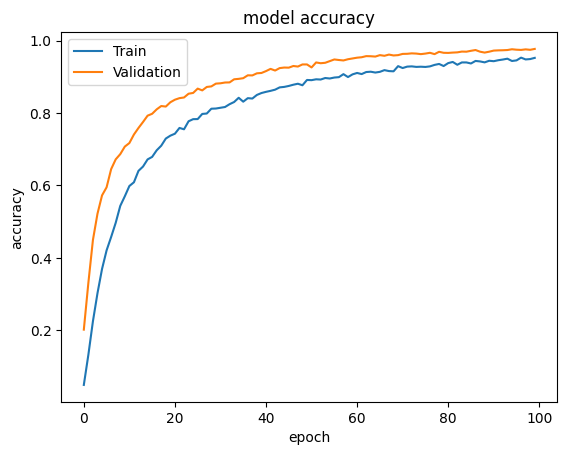

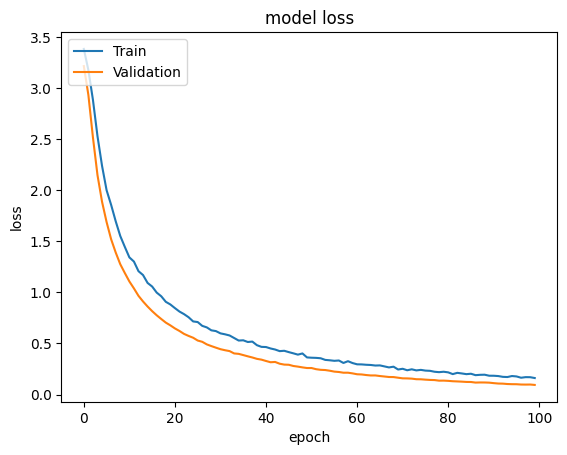

In [28]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(r"C:\Users\kabir\Desktop\Projects\American_Sign_Language\src\visualization\VGG16\Accuracy_5.png")

plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(r"C:\Users\kabir\Desktop\Projects\American_Sign_Language\src\visualization\VGG16\Loss_5.png")

plt.show()

In [7]:
Path_model=r"C:\Users\kabir\Desktop\Projects\American_Sign_Language\models\VGG16\models"
#model.save(os.path.join(Path_model,"American_signs_Recognition_VGG16_5.h5"))

In [8]:
from keras.models import load_model
#from sklearn.metrics import confusion_matrix
from mlxtend.evaluate import confusion_matrix


model = load_model(os.path.join(Path_model,"American_signs_Recognition_VGG16_5.h5"))
# Predict the test data using the trained model
y_pred = model.predict(validation_generator)



408/408 [==============================] - 48s 96ms/step


In [9]:
#Confution Matrix and Classification Report
target_names =['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P',
'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
#print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
conf_matrix=confusion_matrix(validation_generator.classes, y_pred)
print(conf_matrix)


Confusion Matrix
[[925   2   0   0   6   0   0   0   1   0   0   0   3   0   0   0   0   0
    1   0   0   0   0   0   0   0   0   0   0]
 [  0 865   0   0   5   0   0   0   2   0   1   0   2   0   0   0   0   1
    0   0   0   0   1   0   0   0   0   0   0]
 [  0   0 915   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1 880   0   0   0   0   3   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [ 11   6   0   0 862   3   0   0  13   0   2   0   2   0   0   0   0   0
    8   0   0   1   0   0   0   0   0   0   0]
 [  1   0   0   0   0 861   1   0   2   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   1   0   0   0   1]
 [  0   0   0   0   0   0 844  11   0   6   0   0   0   1   0   3   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   5 883   0   5   0   0   0   0   0   1   1   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  

In [32]:
from sklearn.metrics import classification_report

print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


Classification Report
              precision    recall  f1-score   support

           A       0.99      0.99      0.99       938
           B       0.99      0.99      0.99       877
           C       1.00      1.00      1.00       915
           D       1.00      1.00      1.00       884
         del       0.98      0.95      0.96       908
           E       0.99      0.99      0.99       868
           F       0.99      0.98      0.98       865
           G       0.98      0.99      0.98       895
           H       0.96      0.98      0.97       916
           I       0.98      1.00      0.99       948
           J       0.97      0.99      0.98       883
           K       1.00      1.00      1.00       907
           L       0.97      0.96      0.97       880
           M       0.96      0.98      0.97       855
           N       1.00      0.99      0.99       897
     nothing       0.99      0.99      0.99       897
           O       0.99      0.99      0.99       903
     

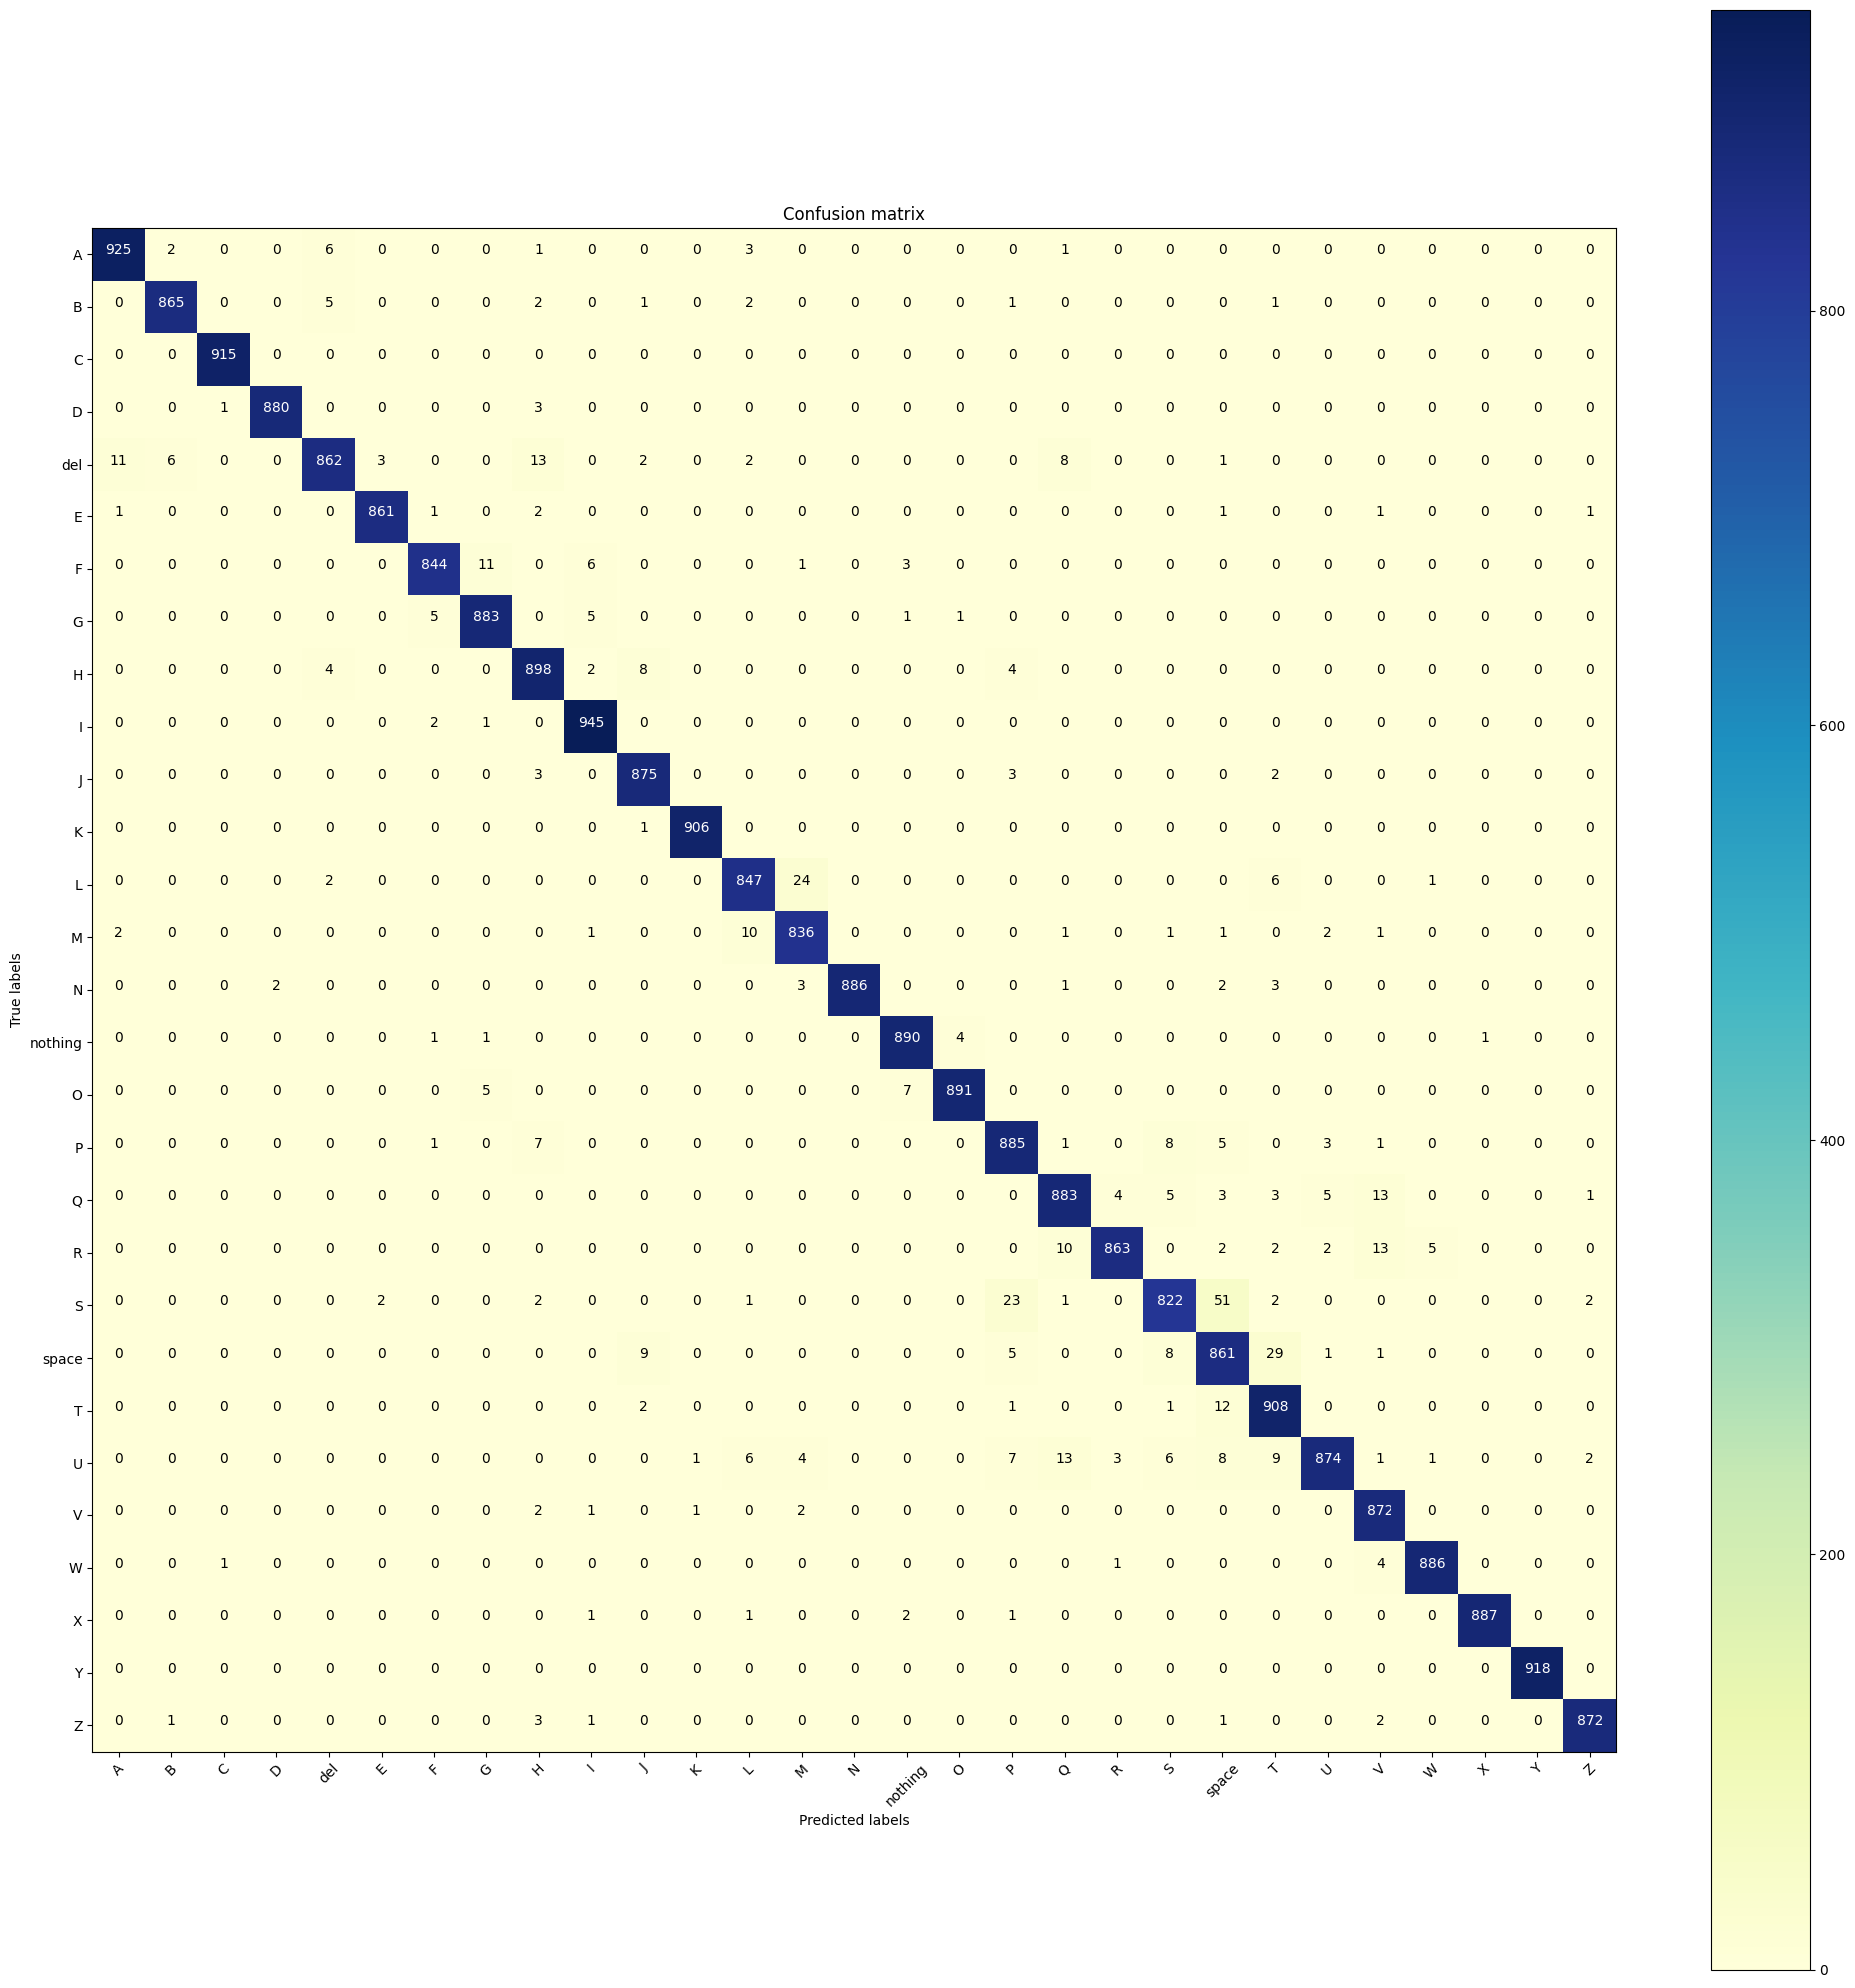

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    """
    arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    """
     
    if cmap is None:
        cmap = plt.get_cmap('YlGnBu')

    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylim(len(target_names)-0.5, -0.5)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    #plt.savefig(r"C:\Users\kabir\Desktop\Projects\Amazigh_handwritten_character_recognition\src\visualization\CNN\Loss_3.png")
    plt.savefig(r"C:\Users\kabir\Desktop\Projects\American_Sign_Language\src\visualization\VGG16\Confusion_matrix_5.png", dpi=500, bbox_inches = 'tight')
    plt.show()
    
from keras.models import load_model
plot_confusion_matrix(conf_matrix, target_names)